<a href="https://colab.research.google.com/github/teambyte444/ZenteiQ_Project/blob/main/TEAM_BYTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
Path = 'drive/My Drive/Dataset'

In [31]:
import pandas as pd
stlist = pd.read_csv(Path+'/student_list.csv')
stlist

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


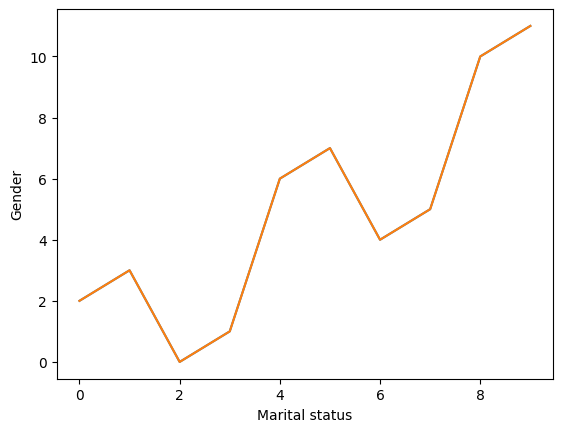

In [32]:
x=np.arange(10)
y=x^2
plt.plot(x,y)
plt.xlabel("Marital status")
plt.ylabel("Gender")
plt.plot(x,y)

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
student_data= pd.read_csv(Path+'/student_list.csv')

In [35]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [36]:
student_data.shape

(4424, 35)

In [37]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [38]:
stlist.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [39]:
student_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

data cleaning

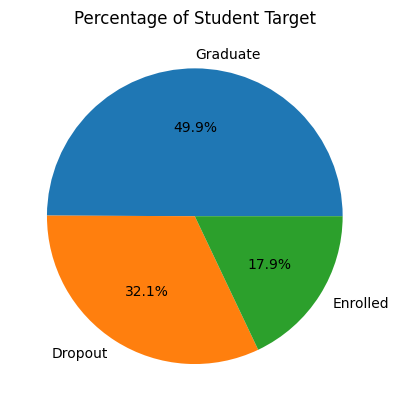

In [40]:
student_target = student_data['Target'].value_counts()

plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

demograpics

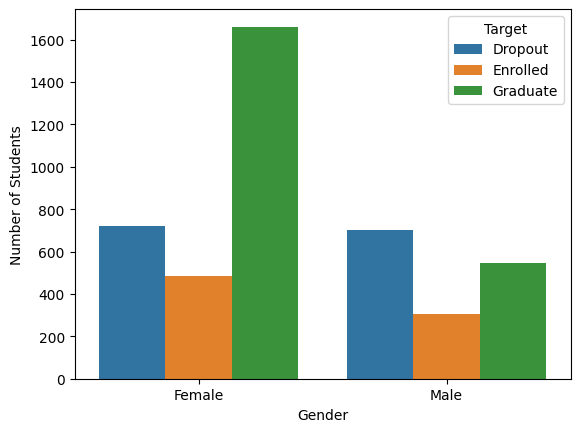

In [41]:
sns.countplot(data=student_data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

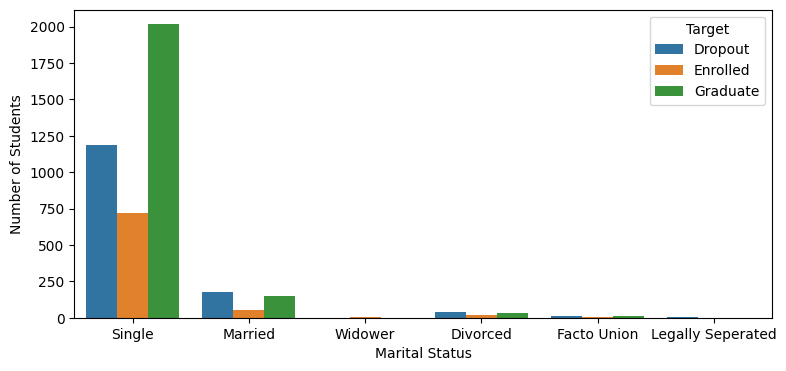

In [42]:
plt.figure(figsize=(9,4))

sns.countplot(data=student_data, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

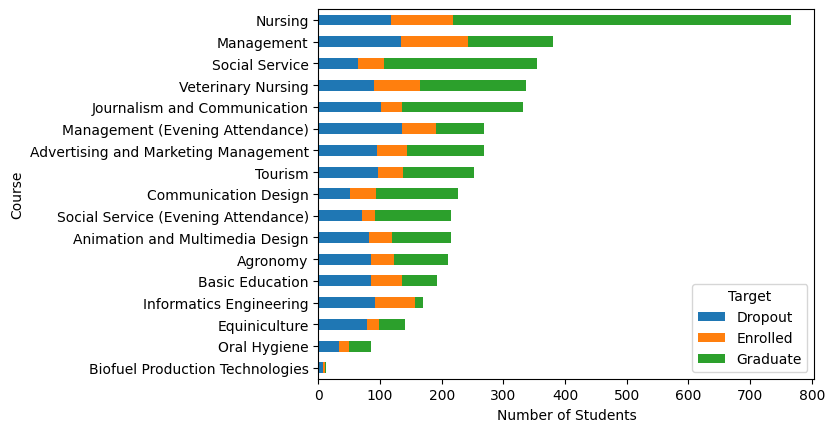

In [43]:
student_course = student_data.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.show()

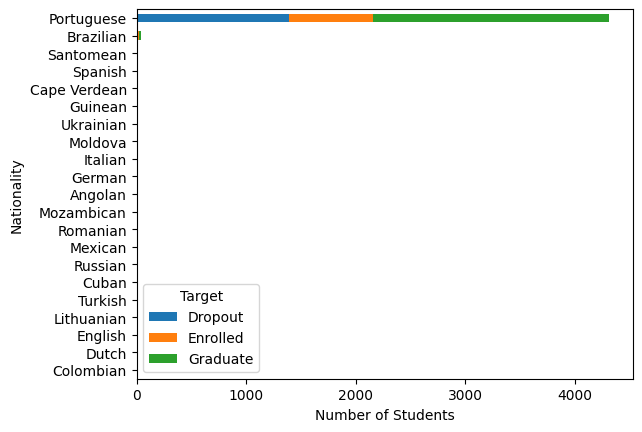

In [44]:
student_nationality = student_data.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns='Target', index='Nacionality', values=0)

# Rename the index of the DataFrame
student_nationality = student_nationality.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})

student_nationality_total = student_nationality.sum(axis=1)
student_nationality_sorted = student_nationality_total.sort_values(ascending=True)
student_nationality.loc[student_nationality_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()


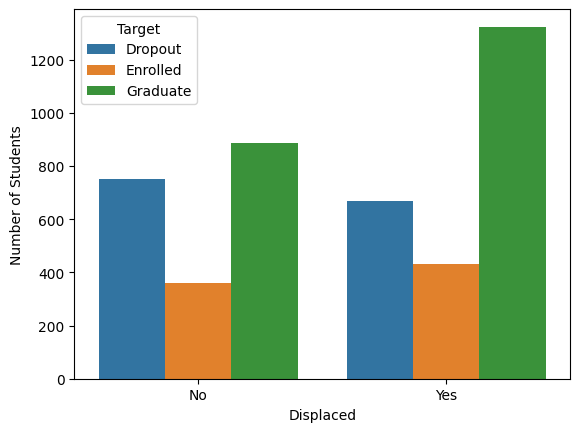

In [45]:
sns.countplot(data=student_data, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()


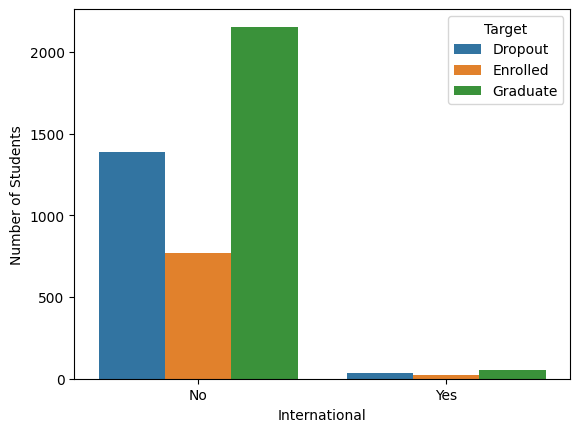

In [46]:
sns.countplot(data=student_data, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

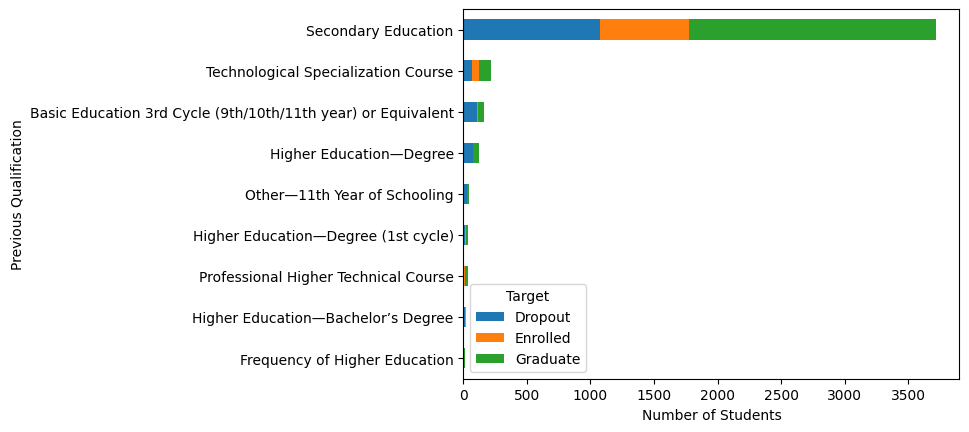

In [47]:
student_prequal = student_data.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

# Rename the index of the DataFrame
student_prequal = student_prequal.rename(index={1:'Secondary Education',2:'Higher Education—Bachelor’s Degree',3:'Higher Education—Degree',4:'Higher Education—Master’s Degree',5:'Higher Education—Doctorate',6:'Frequency of Higher Education',7:'12th Year of Schooling—Not Completed',8:'11th Year of Schooling—Not Completed',9:'Other—11th Year of Schooling',10:'10th Year of Schooling',11:'10th Year of Schooling—Not Completed',12:'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent',13:'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent',14:'Technological Specialization Course',15:'Higher Education—Degree (1st cycle)',16:'Professional Higher Technical Course',17:'Higher Education—Master’s Degree (2nd Cycle)'})

student_prequal_total = student_prequal.sum(axis=1)
student_prequal_sorted = student_prequal_total.sort_values(ascending=True)
student_prequal_top = student_prequal_sorted[8:]
student_prequal.loc[student_prequal_top.index].plot(kind='barh', stacked=True)

plt.xlabel('Count')
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

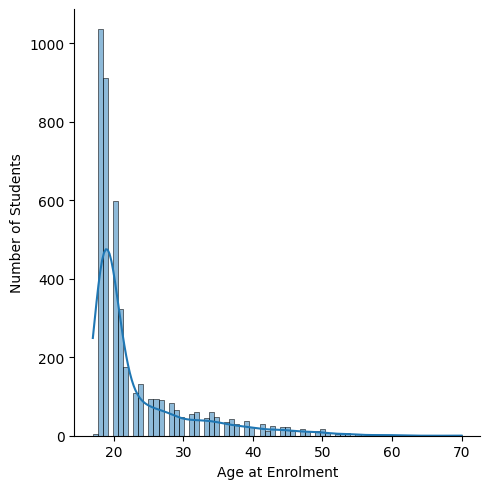

In [48]:
sns.displot(data=student_data, x='Age at enrollment', kde=True)
student_data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

data analysis based on social and economic status of the students

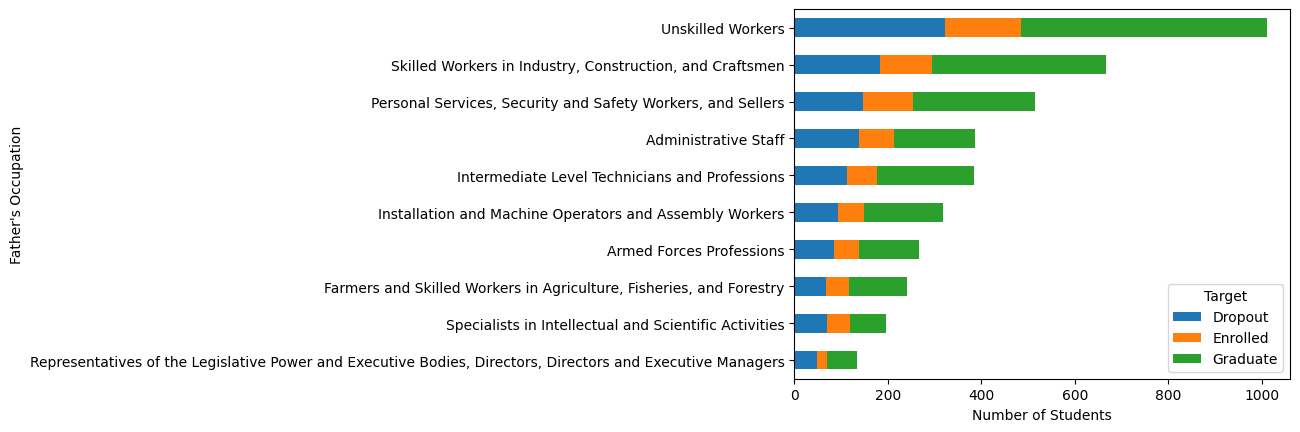

In [49]:
student_occupation = student_data.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

student_occupation = student_occupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_occupation_total = student_occupation.sum(axis=1)
student_occupation_sorted = student_occupation_total.sort_values(ascending=True)
student_occupation_top10 = student_occupation_sorted[36:]
student_occupation.loc[student_occupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.show()

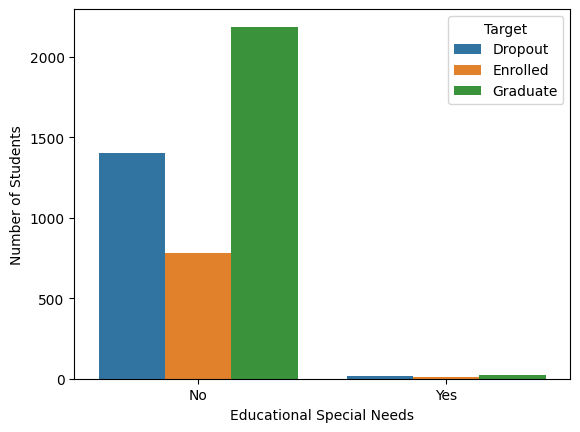

In [50]:
sns.countplot(data=student_data, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

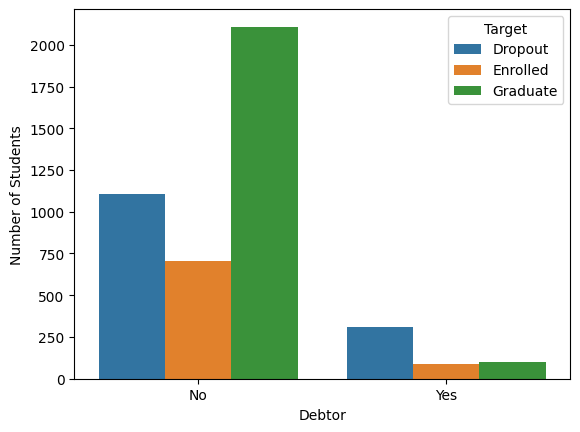

In [51]:
sns.countplot(data=student_data, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

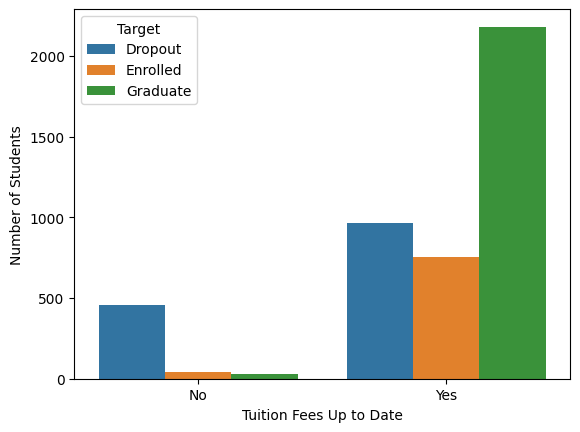

In [52]:
sns.countplot(data=student_data, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

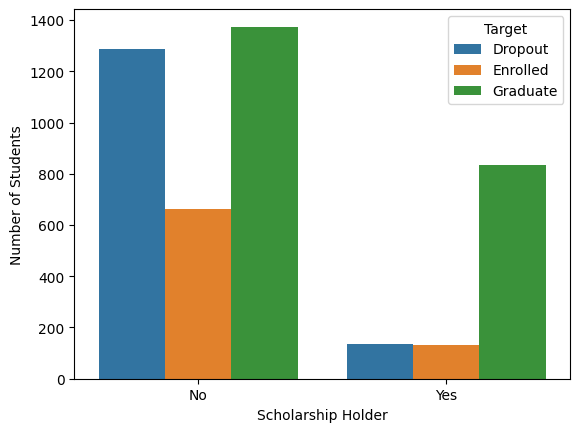

In [53]:
sns.countplot(data=student_data, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

Macroeconomic Status

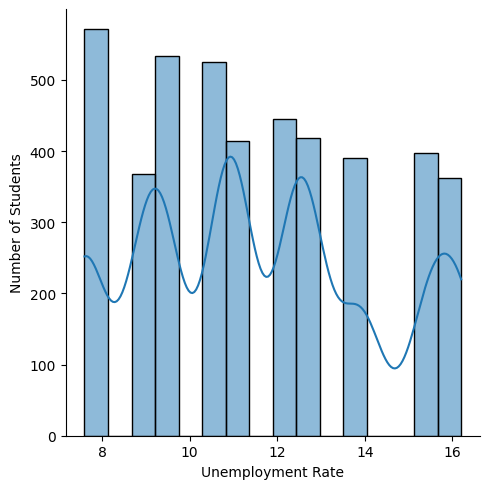

In [54]:
sns.displot(data=student_data, x="Unemployment rate", kde=True)
student_data['Unemployment rate'].describe()

plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

Heatmap

<ipython-input-55-a7b8d4dba916>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(student_data.corr(), cmap='coolwarm')


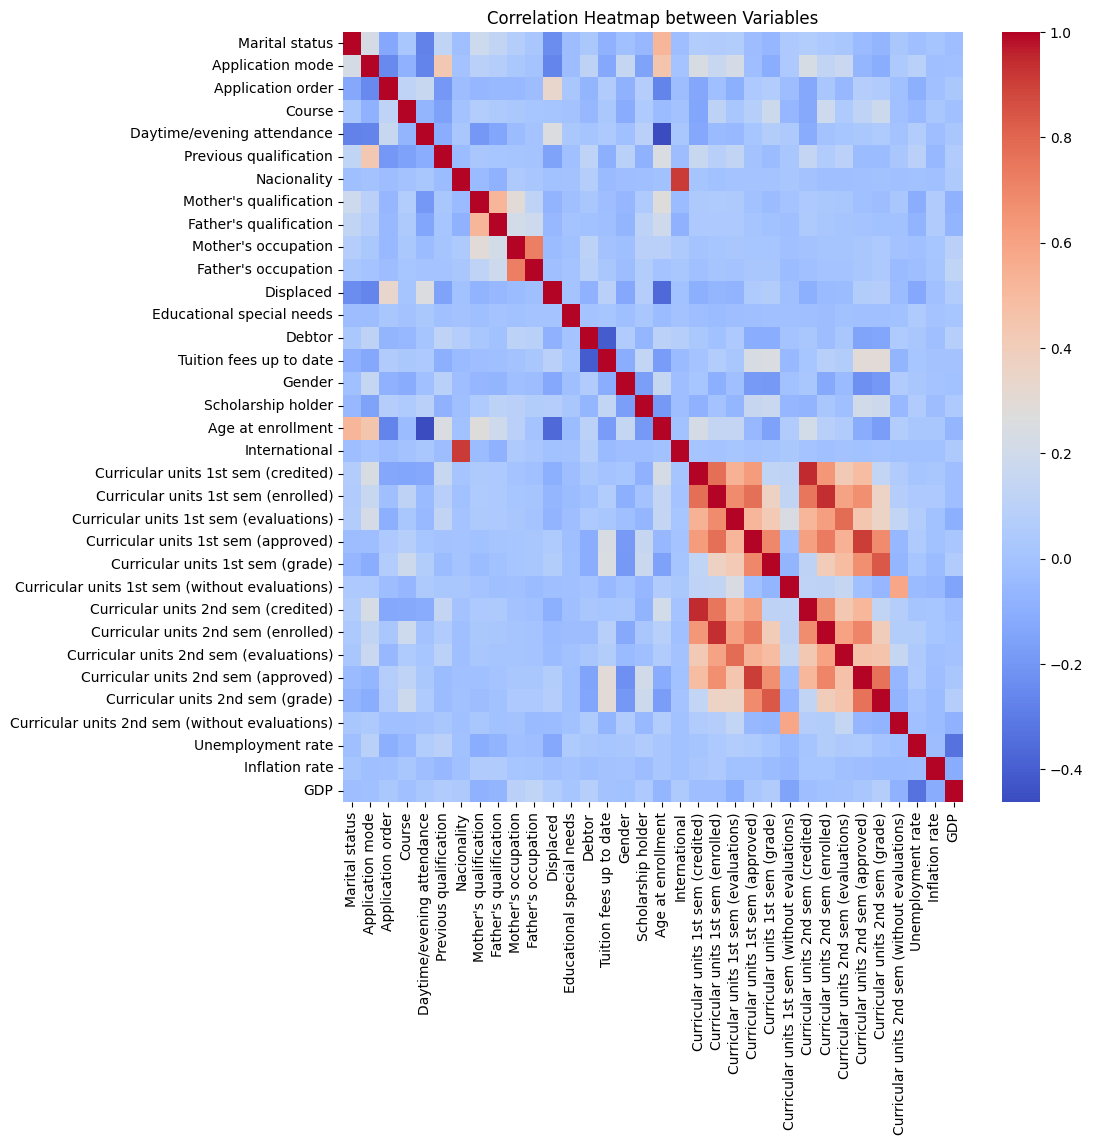

In [55]:
plt.figure(figsize=(10,10))

sns.heatmap(student_data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

Data Modelling
Converting Target Variable into Numeric Form

In [56]:
student_data = student_data.drop(student_data[student_data['Target']=='Enrolled'].index)
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [57]:
encoder = LabelEncoder()

In [58]:
student_data['Target'] = encoder.fit_transform(student_data['Target'])

In [59]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


Splitting Features and Target Variables into X and Y

In [60]:
# Set target variable as X and the remaining variables except Nationality and International as Y
X = student_data.drop(columns=['Nacionality','International','Target'], axis=1)
Y = student_data['Target']

In [61]:
print(X, X.shape)

      Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                   

In [62]:
print(Y, Y.shape)

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64 (3630,)


Splitting Data into Training and Testing Data

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 32) (2904, 32) (726, 32)


XGB Logistic Regression

In [65]:
bin_log = xgb.XGBClassifier(objective='binary:logistic', n_estimators=1000)
bin_log.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Data Prediction and Evaluation of the Model

In [66]:
target_prediction = bin_log.predict(X_test)
print(target_prediction)

[1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 

In [67]:
data_accuracy = accuracy_score(Y_test, target_prediction)
print("Accuracy:", data_accuracy)

Accuracy: 0.9008264462809917


Creating a System for Prediction

In [68]:
# The input data is the 192nd record in the student_data dataset disregarding the Nationality and International record
input_data = (1, 1, 2, 14, 1, 1, 1, 3, 5, 4, 0, 0, 0, 1, 0, 0, 19, 0, 5, 5, 5, 13, 0, 0, 5, 5, 5, 13.2, 0, 9.4, -0.8, -3.12) 
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = bin_log.predict(input_data_reshaped)
print(prediction)
print("The initial value is ",prediction[0])

[1]
The initial value is  1


In [69]:
print(student_data.iloc[192])

Marital status                                     1.00
Application mode                                   1.00
Application order                                  2.00
Course                                            14.00
Daytime/evening attendance                         1.00
Previous qualification                             1.00
Nacionality                                        1.00
Mother's qualification                             1.00
Father's qualification                             3.00
Mother's occupation                                5.00
Father's occupation                                4.00
Displaced                                          0.00
Educational special needs                          0.00
Debtor                                             0.00
Tuition fees up to date                            1.00
Gender                                             0.00
Scholarship holder                                 0.00
Age at enrollment                               

In [70]:
# For reference
print(student_data['Target'].iloc[192])

1
